In [2]:
#What countries are the happiest? 
#What factors contribute to happiness?
#Does Internet usage play a role in a countries happiness score?
#Does personal income play a role in happiness score?


In [3]:
#Reading in both datasets
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
import matplotlib.pyplot as plt
#import geopandas as gpd

hap22 = pd.read_csv('2022.csv')
internet = pd.read_csv('gapminder_internet.csv')


In [4]:
#looking at top and bottom 5 rows of Happiness Data
hap22.head(10)


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
5,6,Luxembourg*,"7,404","7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388"
6,7,Sweden,"7,384","7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512"
7,8,Norway,"7,365","7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474"
8,9,Israel,"7,364","7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
9,10,New Zealand,"7,200","7,279","7,120","1,954","1,852","1,235","0,752","0,680","0,245","0,483"


In [5]:
hap22['Country'] = hap22['Country'].str.replace(r'[^0-9a-zA-Z:,\s]+', '', regex=True)


In [6]:
hap22.head(10)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
5,6,Luxembourg,"7,404","7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388"
6,7,Sweden,"7,384","7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512"
7,8,Norway,"7,365","7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474"
8,9,Israel,"7,364","7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
9,10,New Zealand,"7,200","7,279","7,120","1,954","1,852","1,235","0,752","0,680","0,245","0,483"


In [39]:
#looking at top and bottom 5 rows of Internet Data
A = internet.sort_values(by=['internetuserate'],ascending=False)
A = A.dropna(how='all')
A.head(30)

,country,incomeperperson,internetuserate,urbanrate
85,Iceland,33945.314420,95.638113,92.26
144,Norway,39972.352770,93.277508,77.48
136,Netherlands,26551.844240,90.703555,81.82
111,Luxembourg,52301.587180,90.079527,82.44
184,Sweden,32292.482980,90.016190,84.54
50,Denmark,30532.277040,88.770254,86.68
63,Finland,27110.731590,86.898845,63.30
202,United Kingdom,28033.489280,84.731705,89.94
20,Bermuda,62682.147010,84.654514,100.00
139,New Zealand,14778.163930,83.002584,86.56


In [8]:
dfi.export(internet.head(5), 'int.png')

In [9]:
#combining both datasets by Country name
df = pd.merge(hap22,internet,left_on=['Country'],right_on=['country']) 
df.head(-10)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,country,incomeperperson,internetuserate,urbanrate
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534",Finland,27110.731590,86.898845,63.30
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",Denmark,30532.277040,88.770254,86.68
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",Iceland,33945.314420,95.638113,92.26
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461",Switzerland,37662.751250,82.166660,73.48
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419",Netherlands,26551.844240,90.703555,81.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,131,Ethiopia,"4,241","4,365","4,118","1,375","0,788","0,809","0,457","0,472","0,205","0,136",Ethiopia,220.891248,0.749996,17.00
118,133,Mauritania,"4,153","4,356","3,950","1,207","1,100","0,865","0,450","0,304","0,088","0,138",Mauritania,609.131206,2.999803,41.00
119,134,Jordan,"4,152","4,276","4,029","0,695","1,324","0,724","0,675","0,476","0,058","0,200",Jordan,2534.000380,38.881202,78.42
120,135,Togo,"4,112","4,272","3,953","2,061","0,771","0,322","0,360","0,292","0,174","0,132",Togo,285.224449,5.379820,42.00


In [10]:
#dropping the duplicate Country column from join
df = df.drop(df.columns[12], axis=1)

In [11]:
df.head(-10)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,incomeperperson,internetuserate,urbanrate
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534",27110.731590,86.898845,63.30
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",30532.277040,88.770254,86.68
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",33945.314420,95.638113,92.26
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461",37662.751250,82.166660,73.48
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419",26551.844240,90.703555,81.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,131,Ethiopia,"4,241","4,365","4,118","1,375","0,788","0,809","0,457","0,472","0,205","0,136",220.891248,0.749996,17.00
118,133,Mauritania,"4,153","4,356","3,950","1,207","1,100","0,865","0,450","0,304","0,088","0,138",609.131206,2.999803,41.00
119,134,Jordan,"4,152","4,276","4,029","0,695","1,324","0,724","0,675","0,476","0,058","0,200",2534.000380,38.881202,78.42
120,135,Togo,"4,112","4,272","3,953","2,061","0,771","0,322","0,360","0,292","0,174","0,132",285.224449,5.379820,42.00


In [12]:
#sorting value by income
dfinc = df.sort_values(by='incomeperperson', ascending = False, inplace = False)

In [13]:
dfinc.head(25)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,incomeperperson,internetuserate,urbanrate
5,6,Luxembourg,"7,404","7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388",52301.58718,90.079527,82.44
7,8,Norway,"7,365","7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474",39972.35277,93.277508,77.48
49,54,Japan,"6,039","6,119","5,959","1,487","1,835","1,089","0,866","0,537","0,007","0,218",39309.47886,77.638535,66.48
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461",37662.75125,82.166660,73.48
15,16,United States,"6,977","7,065","6,888","2,214","1,982","1,182","0,628","0,574","0,220","0,177",37491.17952,74.247572,81.70
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",33945.31442,95.638113,92.26
24,27,Singapore,"6,480","6,569","6,392","0,932","2,149","1,127","0,851","0,672","0,163","0,587",32535.83251,71.131707,100.00
6,7,Sweden,"7,384","7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512",32292.48298,90.016190,84.54
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",30532.27704,88.770254,86.68
16,17,United Kingdom,"6,943","7,018","6,867","1,967","1,867","1,143","0,750","0,597","0,289","0,329",28033.48928,84.731705,89.94


In [14]:
#sorting value by internet usage
dfinternet = df.sort_values(by='internetuserate', ascending = False, inplace = False)
dfinternet.head(25)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,incomeperperson,internetuserate,urbanrate
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",33945.314420,95.638113,92.26
7,8,Norway,"7,365","7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474",39972.352770,93.277508,77.48
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419",26551.844240,90.703555,81.82
5,6,Luxembourg,"7,404","7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388",52301.587180,90.079527,82.44
6,7,Sweden,"7,384","7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512",32292.482980,90.016190,84.54
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",30532.277040,88.770254,86.68
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534",27110.731590,86.898845,63.30
16,17,United Kingdom,"6,943","7,018","6,867","1,967","1,867","1,143","0,750","0,597","0,289","0,329",28033.489280,84.731705,89.94
9,10,New Zealand,"7,200","7,279","7,120","1,954","1,852","1,235","0,752","0,680","0,245","0,483",14778.163930,83.002584,86.56
13,14,Germany,"7,034","7,122","6,947","2,142","1,924","1,088","0,776","0,585","0,163","0,358",25306.187190,82.526898,73.64


In [15]:
#sorting value by Urban
dfurban = df.sort_values(by='urbanrate', ascending = False, inplace = False)
dfurban.head(25)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,incomeperperson,internetuserate,urbanrate
24,27,Singapore,"6,480","6,569","6,392","0,932","2,149","1,127","0,851","0,672","0,163","0,587",32535.832510,71.131707,100.00
45,50,Kuwait,"6,106","6,235","5,977","1,621","1,904","0,983","0,747","0,617","0,087","0,147",NaN,38.260234,98.36
17,19,Belgium,"6,805","6,890","6,720","2,283","1,907","1,106","0,764","0,492","0,049","0,204",24496.048260,73.733934,97.36
29,33,Malta,"6,447","6,535","6,359","1,631","1,838","1,169","0,789","0,679","0,174","0,166",11066.784140,63.077993,94.26
96,108,Venezuela,"4,925","5,051","4,800","2,790","0,000","0,968","0,578","0,283","0,225","0,082",5528.363114,35.850437,93.32
27,30,Uruguay,"6,474","6,562","6,386","1,974","1,615","1,180","0,672","0,665","0,103","0,265",9106.327234,47.867469,92.30
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",33945.314420,95.638113,92.26
52,57,Argentina,"5,967","6,090","5,844","1,891","1,592","1,102","0,662","0,555","0,081","0,085",10749.419240,36.000335,92.00
8,9,Israel,"7,364","7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143",22275.751660,65.387786,91.66
16,17,United Kingdom,"6,943","7,018","6,867","1,967","1,867","1,143","0,750","0,597","0,289","0,329",28033.489280,84.731705,89.94


In [16]:
scores= df[["Happiness score", "Country","internetuserate","incomeperperson"]]

In [17]:
scores

,Happiness score,Country,internetuserate,incomeperperson
0,"7,821",Finland,86.898845,27110.731590
1,"7,636",Denmark,88.770254,30532.277040
2,"7,557",Iceland,95.638113,33945.314420
3,"7,512",Switzerland,82.166660,37662.751250
4,"7,415",Netherlands,90.703555,26551.844240
...,...,...,...,...
127,"3,471",Botswana,5.999836,4189.436587
128,"3,268",Rwanda,13.000006,338.266391
129,"2,995",Zimbabwe,11.500415,320.771890
130,"2,955",Lebanon,31.004378,6746.612632


In [18]:
df2= df
df2= df2.drop('Country',axis='columns')
df2= df2.drop('RANK',axis='columns')
df2= df2.drop('Whisker-high',axis='columns')
df2= df2.drop('Whisker-low',axis='columns')
df2 = df2.replace(',','', regex=True)
df2= df2.astype(float)

<AxesSubplot:xlabel='Happiness score', ylabel='internetuserate'>

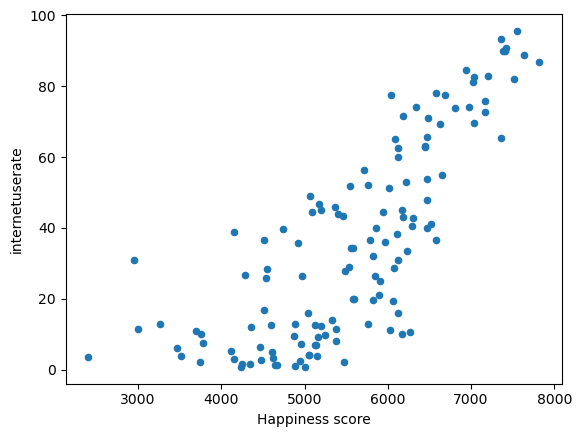

In [19]:
plot1 =df2.plot.scatter(y="internetuserate",x="Happiness score" )
plot1

In [20]:
# with the happniness score going from highiest on the left to lowest on the right.
# We can plainly see that there seems to be some correlation between the two factors.


<AxesSubplot:xlabel='Happiness score', ylabel='Explained by: GDP per capita'>

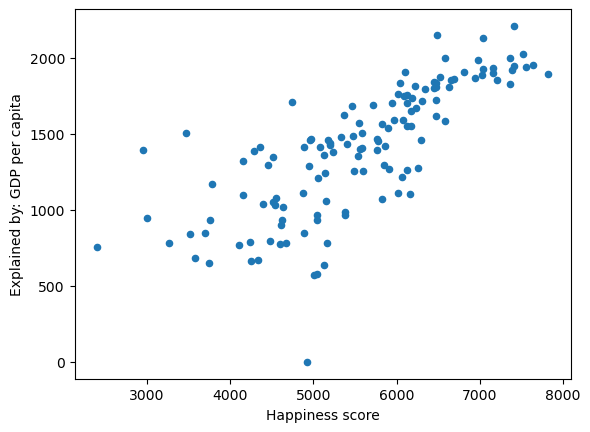

In [21]:
plot2=df2.plot.scatter(y="Explained by: GDP per capita",x="Happiness score" )
plot2

In [22]:
# from the graph above it seems those with lower income have a large range of happniess score but those above 20,000 all are in a small and similar range.


<AxesSubplot:xlabel='Happiness score', ylabel='incomeperperson'>

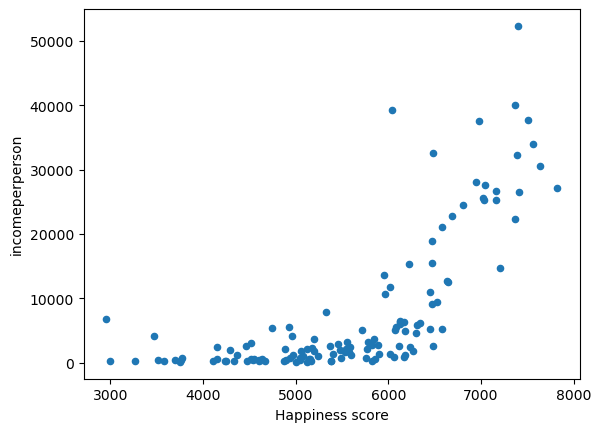

In [23]:
plot2=df2.plot.scatter(y="incomeperperson",x="Happiness score" )
plot2

In [24]:
data2= df[["Happiness score","internetuserate"]]
data3= df[["Happiness score","incomeperperson"]]

In [25]:
data2

,Happiness score,internetuserate
0,"7,821",86.898845
1,"7,636",88.770254
2,"7,557",95.638113
3,"7,512",82.166660
4,"7,415",90.703555
...,...,...
127,"3,471",5.999836
128,"3,268",13.000006
129,"2,995",11.500415
130,"2,955",31.004378


In [26]:
data2 = data2.replace(',','', regex=True)
data2= data2.astype(float)

In [27]:
data2.corr("pearson")

,Happiness score,internetuserate
Happiness score,1.000000,0.785811
internetuserate,0.785811,1.000000


In [26]:
data2.corr("kendall")

,Happiness score,internetuserate
Happiness score,1.00000,0.60062
internetuserate,0.60062,1.00000


In [27]:
data3 = data3.replace(',','', regex=True)
data3= data3.astype(float)

In [28]:
data3.corr("kendall")

,Happiness score,incomeperperson
Happiness score,1.000000,0.602375
incomeperperson,0.602375,1.000000


In [29]:
data3.corr("pearson")

,Happiness score,incomeperperson
Happiness score,1.000000,0.710775
incomeperperson,0.710775,1.000000


In [30]:
# doing a correlation test of entire data set to see if anything stands out


In [31]:
totalcorr =df2.corr("kendall")
totalcorr

,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,incomeperperson,internetuserate,urbanrate
Happiness score,1.000000,0.309491,0.647229,0.626071,0.589039,0.452114,0.011358,0.259751,0.602375,0.600620,0.471596
Dystopia (1.83) + residual,0.309491,1.000000,0.009258,0.057666,0.035311,0.052126,0.068166,0.055533,0.041445,0.045937,0.090730
Explained by: GDP per capita,0.647229,0.009258,1.000000,0.594976,0.658411,0.337193,-0.107544,0.222171,0.790551,0.698593,0.560620
Explained by: Social support,0.626071,0.057666,0.594976,1.000000,0.518905,0.350597,0.012523,0.165478,0.542546,0.559613,0.405603
Explained by: Healthy life expectancy,0.589039,0.035311,0.658411,0.518905,1.000000,0.304778,-0.091705,0.204638,0.651882,0.648410,0.471848
Explained by: Freedom to make life choices,0.452114,0.052126,0.337193,0.350597,0.304778,1.000000,0.126203,0.291747,0.281765,0.300740,0.158870
Explained by: Generosity,0.011358,0.068166,-0.107544,0.012523,-0.091705,0.126203,1.000000,0.076972,-0.132120,-0.056156,-0.118206
Explained by: Perceptions of corruption,0.259751,0.055533,0.222171,0.165478,0.204638,0.291747,0.076972,1.000000,0.230476,0.227042,0.177899
incomeperperson,0.602375,0.041445,0.790551,0.542546,0.651882,0.281765,-0.132120,0.230476,1.000000,0.672982,0.612477
internetuserate,0.600620,0.045937,0.698593,0.559613,0.648410,0.300740,-0.056156,0.227042,0.672982,1.000000,0.515625


In [32]:
# GDP INcome, internet and social support have the highest correlation with happniness score from .61 to .67
#following this is life expectency at .57  thenm urban rate at .46 and freedom to make life choices at .45

In [33]:
totalcorr2 =df2.corr("pearson")
totalcorr2

,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,incomeperperson,internetuserate,urbanrate
Happiness score,1.000000,0.514962,0.770566,0.798027,0.763851,0.616078,0.042490,0.447927,0.710775,0.785811,0.637297
Dystopia (1.83) + residual,0.514962,1.000000,-0.044848,0.120728,0.061568,0.097964,0.044999,-0.008272,0.135867,0.110452,0.148262
Explained by: GDP per capita,0.770566,-0.044848,1.000000,0.741011,0.814889,0.468375,-0.179256,0.384587,0.711313,0.827319,0.701766
Explained by: Social support,0.798027,0.120728,0.741011,1.000000,0.686429,0.493960,0.001104,0.249968,0.536388,0.677817,0.580632
Explained by: Healthy life expectancy,0.763851,0.061568,0.814889,0.686429,1.000000,0.443362,-0.128928,0.369153,0.628029,0.794264,0.654675
Explained by: Freedom to make life choices,0.616078,0.097964,0.468375,0.493960,0.443362,1.000000,0.149474,0.434004,0.383910,0.439655,0.213859
Explained by: Generosity,0.042490,0.044999,-0.179256,0.001104,-0.128928,0.149474,1.000000,0.115841,0.046909,-0.046356,-0.181690
Explained by: Perceptions of corruption,0.447927,-0.008272,0.384587,0.249968,0.369153,0.434004,0.115841,1.000000,0.639700,0.524651,0.288437
incomeperperson,0.710775,0.135867,0.711313,0.536388,0.628029,0.383910,0.046909,0.639700,1.000000,0.817929,0.591987
internetuserate,0.785811,0.110452,0.827319,0.677817,0.794264,0.439655,-0.046356,0.524651,0.817929,1.000000,0.689546


In [34]:
type(totalcorr)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Happiness score', ylabel='Explained by: GDP per capita'>

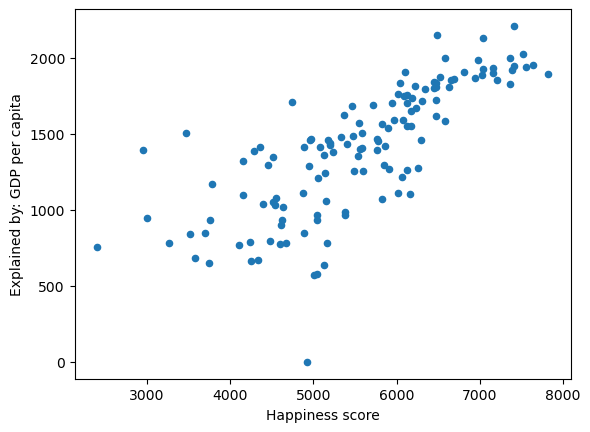

In [30]:
plot2=df2.plot.scatter(y="Explained by: GDP per capita",x="Happiness score" )
plot2

In [35]:
#adding third dataset to map countries to a region in order to take a more macro view of happiness by region
#NEED TO DELETE "*" in Country column of 2022 happiness dataset for more country matches when combining tables
#region = pd.read_csv('countryContinent.csv')

region = pd.read_csv('countryContinent.csv', encoding='latin')
region.head(-10)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
234,United Kingdom of Great Britain and Northern I...,GB,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,150.0,154.0
235,United States of America,US,USA,840,ISO 3166-2:US,Americas,Northern America,19.0,21.0
236,United States Minor Outlying Islands,UM,UMI,581,ISO 3166-2:UM,NaN,NaN,NaN,NaN
237,Uruguay,UY,URY,858,ISO 3166-2:UY,Americas,South America,19.0,5.0


In [36]:
#merging in region dataset
df = pd.merge(df,region,left_on=['Country'],right_on=['country']) 
df.head(-10)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,urbanrate,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736",...,63.30,Finland,FI,FIN,246,ISO 3166-2:FI,Europe,Northern Europe,150.0,154.0
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719",...,86.68,Denmark,DK,DNK,208,ISO 3166-2:DK,Europe,Northern Europe,150.0,154.0
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718",...,92.26,Iceland,IS,ISL,352,ISO 3166-2:IS,Europe,Northern Europe,150.0,154.0
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677",...,73.48,Switzerland,CH,CHE,756,ISO 3166-2:CH,Europe,Western Europe,150.0,155.0
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651",...,81.82,Netherlands,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,150.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,130,Chad,"4,251","4,503","3,999","2,419","0,662","0,506","0,225","0,180",...,26.68,Chad,TD,TCD,148,ISO 3166-2:TD,Africa,Middle Africa,2.0,17.0
108,131,Ethiopia,"4,241","4,365","4,118","1,375","0,788","0,809","0,457","0,472",...,17.00,Ethiopia,ET,ETH,231,ISO 3166-2:ET,Africa,Eastern Africa,2.0,14.0
109,133,Mauritania,"4,153","4,356","3,950","1,207","1,100","0,865","0,450","0,304",...,41.00,Mauritania,MR,MRT,478,ISO 3166-2:MR,Africa,Western Africa,2.0,11.0
110,134,Jordan,"4,152","4,276","4,029","0,695","1,324","0,724","0,675","0,476",...,78.42,Jordan,JO,JOR,400,ISO 3166-2:JO,Asia,Western Asia,142.0,145.0


In [37]:
#dropping the duplicate Country column from join
df = df.drop(df.columns[15], axis=1)
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,internetuserate,urbanrate,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736",...,86.898845,63.30,FI,FIN,246,ISO 3166-2:FI,Europe,Northern Europe,150.0,154.0
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719",...,88.770254,86.68,DK,DNK,208,ISO 3166-2:DK,Europe,Northern Europe,150.0,154.0
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718",...,95.638113,92.26,IS,ISL,352,ISO 3166-2:IS,Europe,Northern Europe,150.0,154.0
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677",...,82.166660,73.48,CH,CHE,756,ISO 3166-2:CH,Europe,Western Europe,150.0,155.0
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651",...,90.703555,81.82,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,150.0,155.0


In [38]:
minhapregion = df.groupby(['continent'])['Happiness score'].min()
maxhapregion = df.groupby(['continent'])['Happiness score'].max()
print(minhapregion)
print(maxhapregion)

continent
Africa      2,995
Americas    5,533
Asia        2,404
Europe      5,084
Oceania     7,162
Name: Happiness score, dtype: object
continent
Africa      6,071
Americas    7,025
Asia        7,364
Europe      7,821
Oceania     7,200
Name: Happiness score, dtype: object


In [39]:
#.mean() function only works on int or float - need to convert happiness to numeric
df["Happiness score"]= df["Happiness score"].str.replace(",", "")
df['Happiness score'] = df['Happiness score'].astype(int)
print(df.dtypes)

RANK                                            int64
Country                                        object
Happiness score                                 int32
Whisker-high                                   object
Whisker-low                                    object
Dystopia (1.83) + residual                     object
Explained by: GDP per capita                   object
Explained by: Social support                   object
Explained by: Healthy life expectancy          object
Explained by: Freedom to make life choices     object
Explained by: Generosity                       object
Explained by: Perceptions of corruption        object
incomeperperson                               float64
internetuserate                               float64
urbanrate                                     float64
code_2                                         object
code_3                                         object
country_code                                    int64
iso_3166_2                  

continent
Africa      4519.361111
Americas    6107.058824
Asia        5352.529412
Europe      6531.939394
Oceania     7181.000000
Name: Happiness score, dtype: float64


  continent  Happiness score
4   Oceania      7181.000000
3    Europe      6531.939394
1  Americas      6107.058824
2      Asia      5352.529412
0    Africa      4519.361111


<AxesSubplot:xlabel='continent'>

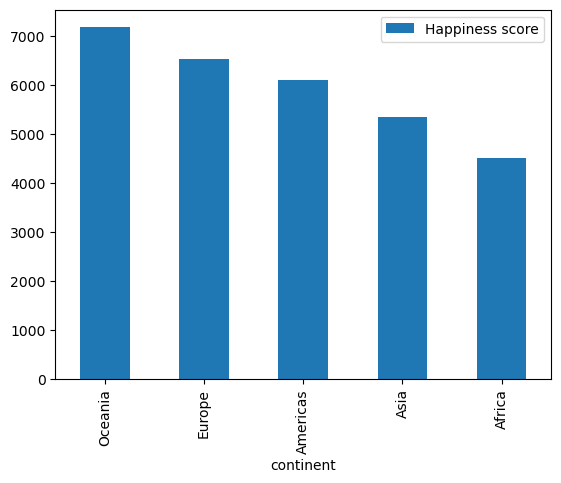

In [41]:
meanhapregion = pd.DataFrame({'continent': meanhapregion.index, 'Happiness score': meanhapregion.values})
meanhapregion = meanhapregion.sort_values(by='Happiness score', ascending = False)
print(meanhapregion)

meanhapregion.plot(x='continent', y='Happiness score', kind='bar')

  continent  incomeperperson
4   Oceania     20014.074995
3    Europe     16439.623446
2      Asia      6343.723863
1  Americas      5520.398253
0    Africa      1292.120641


<AxesSubplot:xlabel='continent'>

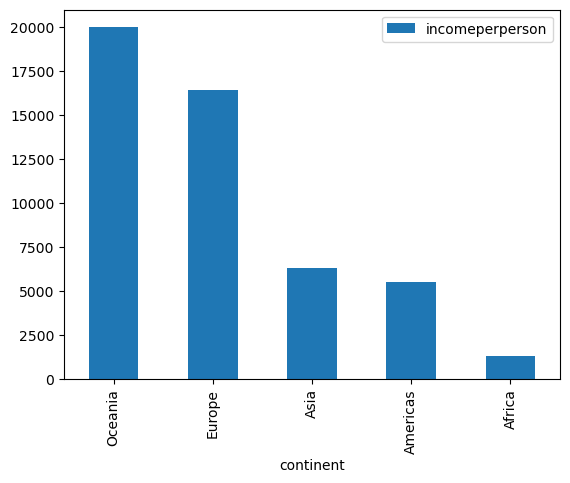

In [42]:
#Income per person by continent
meanincregion = df.groupby(['continent'])['incomeperperson'].mean()
meanincregion = pd.DataFrame({'continent': meanincregion.index, 'incomeperperson': meanincregion.values})
meanincregion = meanincregion.sort_values(by='incomeperperson', ascending = False)
print(meanincregion)

meanincregion.plot(x='continent', y='incomeperperson', kind='bar')

In [43]:
df2 = pd.merge(meanhapregion,meanincregion,left_on=['continent'],right_on=['continent']) 
print(df2)

  continent  Happiness score  incomeperperson
0   Oceania      7181.000000     20014.074995
1    Europe      6531.939394     16439.623446
2  Americas      6107.058824      5520.398253
3      Asia      5352.529412      6343.723863
4    Africa      4519.361111      1292.120641


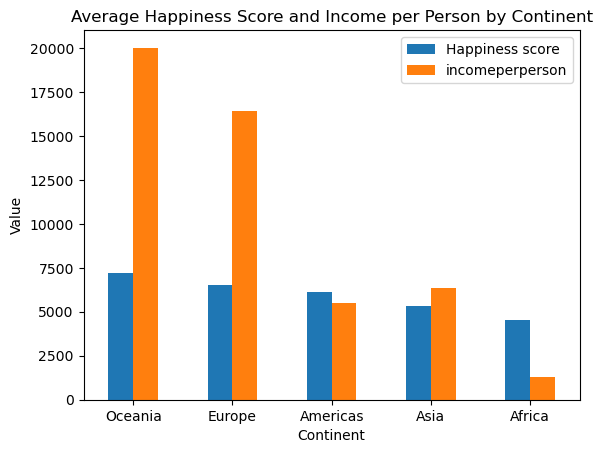

In [44]:
#plot both income per person and happiness rating side by side
ax = df2.plot.bar(x='continent', y=['Happiness score', 'incomeperperson'], rot=0)

# Add labels and titles
ax.set_xlabel('Continent')
ax.set_ylabel('Value')
ax.set_title('Average Happiness Score and Income per Person by Continent')

# Show the chart
plt.show()


In [45]:
n = len(pd.unique(df['sub_region']))
u = pd.unique(df['sub_region'])
print(u)

['Northern Europe' 'Western Europe' 'Western Asia'
 'Australia and New Zealand' 'Northern America' 'Southern Europe'
 'Central America' 'South-Eastern Asia' 'Eastern Europe' 'South America'
 'Central Asia' 'Eastern Africa' 'Eastern Asia' 'Caribbean'
 'Southern Asia' 'Northern Africa' 'Southern Africa' 'Western Africa'
 'Middle Africa']


In [46]:
#looking into region rather than continent
meanhapregion2 = df.groupby(['sub_region'])['Happiness score'].mean()
print(meanhapregion2)

sub_region
Australia and New Zealand    7181.000000
Caribbean                    5850.000000
Central America              6226.857143
Central Asia                 5795.200000
Eastern Africa               4293.363636
Eastern Asia                 5795.000000
Eastern Europe               5827.000000
Middle Africa                4752.333333
Northern Africa              4863.200000
Northern America             7025.000000
Northern Europe              7085.666667
South America                5919.625000
South-Eastern Asia           5465.714286
Southern Africa              4159.000000
Southern Asia                4265.166667
Southern Europe              6072.818182
Western Africa               4635.461538
Western Asia                 5521.076923
Western Europe               7145.714286
Name: Happiness score, dtype: float64


                   sub_region  Happiness score
0   Australia and New Zealand      7181.000000
18             Western Europe      7145.714286
10            Northern Europe      7085.666667
9            Northern America      7025.000000
2             Central America      6226.857143
15            Southern Europe      6072.818182
11              South America      5919.625000
1                   Caribbean      5850.000000
6              Eastern Europe      5827.000000
3                Central Asia      5795.200000
5                Eastern Asia      5795.000000
17               Western Asia      5521.076923
12         South-Eastern Asia      5465.714286
8             Northern Africa      4863.200000
7               Middle Africa      4752.333333
16             Western Africa      4635.461538
4              Eastern Africa      4293.363636
14              Southern Asia      4265.166667
13            Southern Africa      4159.000000


<AxesSubplot:xlabel='sub_region'>

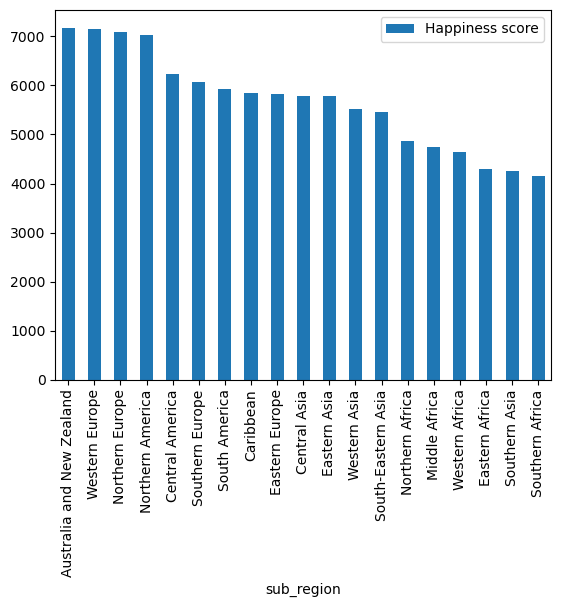

In [47]:
#mean happiness by region
meanhapregion2 = pd.DataFrame({'sub_region': meanhapregion2.index, 'Happiness score': meanhapregion2.values})
meanhapregion2 = meanhapregion2.sort_values(by='Happiness score', ascending = False)
print(meanhapregion2)

meanhapregion2.plot(x='sub_region', y='Happiness score', kind='bar')

                   sub_region  incomeperperson
18             Western Europe     30841.409829
9            Northern America     25575.352620
10            Northern Europe     23114.471745
0   Australia and New Zealand     20014.074995
5                Eastern Asia     14169.294499
15            Southern Europe      8856.078439
17               Western Asia      8408.618589
12         South-Eastern Asia      7253.039989
11              South America      5081.539422
1                   Caribbean      3665.348369
6              Eastern Europe      3528.432728
2             Central America      3421.964848
8             Northern Africa      3420.458400
13            Southern Africa      2774.516849
7               Middle Africa      1723.429803
3                Central Asia      1229.716039
4              Eastern Africa       772.124405
14              Southern Asia       715.462611
16             Western Africa       357.871217


<AxesSubplot:xlabel='sub_region'>

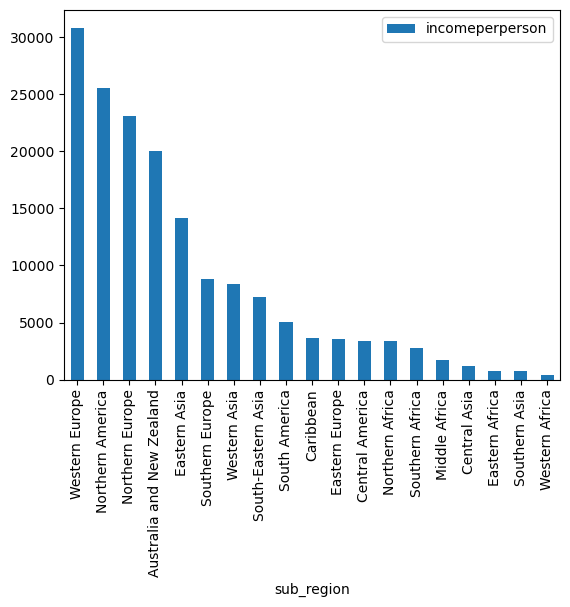

In [48]:
#mean income per person by region
meanincregion2 = df.groupby(['sub_region'])['incomeperperson'].mean()
meanincregion2 = pd.DataFrame({'sub_region': meanincregion2.index, 'incomeperperson': meanincregion2.values})
meanincregion2 = meanincregion2.sort_values(by='incomeperperson', ascending = False)
print(meanincregion2)

meanincregion2.plot(x='sub_region', y='incomeperperson', kind='bar')

                   sub_region  internetuserate
10            Northern Europe        81.428996
18             Western Europe        81.348681
9            Northern America        81.338393
0   Australia and New Zealand        79.449119
15            Southern Europe        54.540191
6              Eastern Europe        48.379777
17               Western Asia        43.062936
5                Eastern Asia        41.638776
11              South America        36.139942
12         South-Eastern Asia        30.798622
8             Northern Africa        27.760706
1                   Caribbean        26.477223
2             Central America        22.540884
3                Central Asia        17.231771
4              Eastern Africa        10.521427
14              Southern Asia         8.594037
16             Western Africa         7.301348
13            Southern Africa         7.174029
7               Middle Africa         4.310744


<AxesSubplot:xlabel='sub_region'>

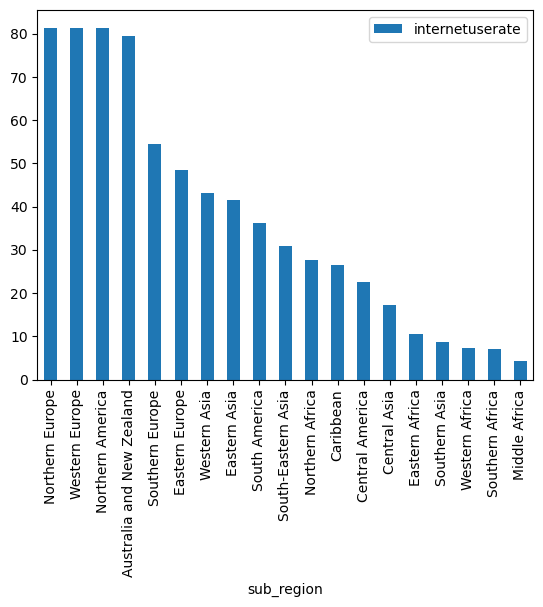

In [49]:
#mean internet usage per person by region
meanincregion2 = df.groupby(['sub_region'])['internetuserate'].mean()
meanincregion2 = pd.DataFrame({'sub_region': meanincregion2.index, 'internetuserate': meanincregion2.values})
meanincregion2 = meanincregion2.sort_values(by='internetuserate', ascending = False)
print(meanincregion2)

meanincregion2.plot(x='sub_region', y='internetuserate', kind='bar')